クラスタリング

In [1]:
# クラスタリングのための人工データセット確認
import numpy as np
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

【問題1】中心点の初期値を決める

In [2]:
#　ランダムにデータ点 Xn の中からランダムに K 個選ぶ関数を作成

def random_sample(X,k):
    """
    データ点 X の中からランダムに K 個選ぶ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:選ぶ数
    
    Returns
    -------
    sample_point   次の形のndarray, shape (k, n_features)
        k個のサンプル
    
    """
    import numpy as np
    import random
    a=random.sample(range(len(X)),k)
    sample_point=[X[a[0]]]
    if not(len(a)==1):    
        for i in range(1,len(a)):
            sample_point=np.vstack([sample_point,X[a[i]]])

    return sample_point


【問題2】SSEを求める関数の作成

In [115]:
# list_wariはこの先で作る、関数から得られる割り当てリスト

def SSE_sampel(list_wari,jushin):
    """
    SSEを計算
    Parameters
    ----------
    list_wari:SSEを計算する際の振り分けリスト、リストの中にndarray
    jushin : 次の形のndarray, shape (k, n_features)
    Returns
    -------
    SSE: SSEの値を返す 
    """
    
    chi=0
    lista=[]
    for j in range(len(daz[0])):
            for i in range(len(daz[0][j])):
                chi+=np.linalg.norm((daz[0][j][i]-chiz[0][j]), ord=2)
    
    SSE=chi 
    return chi

【問題3】クラスタへの割り当て

In [314]:
# すべてのデータ点 Xn を最も近い中心点 μk に割り当てるコードを作成
# データを任意のk個のクラスに分ける、その際に中心点から最も近いものをそのクラスにする

def wariate_sample(X,k,tyusin):
    """
    クラスの割り当てリストを作成
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:クラス数
    tyusin:k個の中心点　(k, n_features)
    
    Returns
    -------
    class_list:   割り当てクラスリストを返す
    
    """
    # k個のからのリスト（割り当てリストの元）を作成
    lists = [[] for _ in range(k)]
    
    # iでiのデータのk個の距離を計算しリスト化→最小のものを選択しリストへiを入れる
    # 上のをXのデータの数だけ（j）続ける
    
    
    for j in range(len(X)):
        chi=0
        chi2=0
        lista=[]
        for i in range(len(tyusin)):
            chi=np.linalg.norm((X[j]-tyusin[i]), ord=2)
            lista.append(chi)            
        lists[lista.index(min(lista))].append(X[j])
    
    return lists

【問題4】中心点の移動

In [20]:
# k個の平均値（重心）を計算するコードコードを作成

def jushin_sample(lists,k,X_index=2):
    """
    重心を計算
    Parameters
    ----------
    lists : 問題３の割り当てリスト
    k:クラスの数
    X_index:特徴量の数、デフォルトは２
    
    Returns
    -------
    jushin:   k個の重心の座標を返す
    
    """
    import numpy as np
    jushin=[]
    for i in (range(len(lists))):
        for j in range(X_index):
            da=0
            for m in range(len(lists[i])):
                da+=lists[i][m][j]
            da1=da/len(lists[i])
            jushin.append(da1)
    jushin=np.array(jushin)
    jushin=jushin.reshape(k,X_index)
    
    return jushin

In [21]:
jushin_sample(bb,3,X_index=2)

array([[-0.47896085,  7.36839231],
       [-1.60597389,  7.73276669],
       [ 0.46700853,  2.73795614]])

In [23]:
a=jushin_sample(bb,3,X_index=2)
a.shape

(3, 2)

【問題5】繰り返し

In [6]:
# 問題４までの関数がそれぞれしっかりと動いているか確認（SSEは計算しない）し、その上で繰り返しを行う
#　データはX、クラス数のkは４、X_index=2とする

#　まず初期値をランダムで決定
#　適当な初期値k=3が返ってきた
random_sample(X,3)

array([[0.99914934, 4.2101954 ],
       [1.85367905, 1.5088862 ],
       [1.05374379, 4.49286859]])

In [7]:
# 次に上の中心点からXの割り当てリストを得る

tyushin1=random_sample(X,3)
wariate_sample(X,3,tyushin1)

[[array([0.72086751, 3.71347124]),
  array([1.35678894, 4.36462484]),
  array([1.05374379, 4.49286859]),
  array([1.59141542, 4.90497725]),
  array([0.78260667, 4.15263595]),
  array([-1.95751686,  3.87291474]),
  array([0.12313498, 5.27917503]),
  array([-0.33533163,  3.390122  ]),
  array([-1.86407034,  2.93379754]),
  array([2.11114739, 3.57660449]),
  array([-1.91186205,  3.18750686]),
  array([0.5285368 , 4.49723858]),
  array([-1.57613028,  2.58614312]),
  array([-0.565433  ,  3.65813966]),
  array([0.802314  , 4.38196181]),
  array([-1.21986433,  3.3789856 ]),
  array([1.13280393, 3.87673946]),
  array([-1.89928142,  2.50466299]),
  array([1.04829186, 5.03092408]),
  array([-1.44356727,  3.23539798]),
  array([-1.98331513,  3.47639041]),
  array([-1.87418794,  2.84306499]),
  array([-1.84482705,  3.25609891]),
  array([0.72144399, 4.08475018]),
  array([0.5323772 , 3.31338909]),
  array([0.3498724 , 4.69253251]),
  array([-1.2386086 ,  2.81373288]),
  array([-1.74448079,  3.8425

In [8]:
# 初期値から３つのグループに割り当てたリストが返ってきたので、それぞれのクラスの重心を計算する
# こうして新たな重心が返ってきたのでまた上に戻りそれを繰り返す

listsa=wariate_sample(X,3,tyushin1)
jushin_sample(listsa,k=3,X_index=2)

array([[-0.27678616,  3.72096344],
       [ 1.99186903,  0.96561071],
       [-1.26811733,  7.76378266]])

In [25]:
#　指定した回数に到達するループ分を作成

def sample_kmeans(X,k,n,X_index=2):
    """
    中心点決定、割り当て、中心点移動をn回繰り返し中心点とその時の割り当てを返す
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:クラスの数
    X_index:特徴量の数、デフォルトは２
    n: 繰り返しの回数

    Returns
    -------
    tyushin: k個の重心の座標を返す
    lists: 割り当てリスト  
    """
    
    import numpy as np
    import random
    a=random.sample(range(len(X)),k)
    sample_point=[X[a[0]]]
    if not(len(a)==1):    
        for i in range(1,len(a)):
            sample_point=np.vstack([sample_point,X[a[i]]])
    tyusin=sample_point
    
    for i in range(n):
        # k個のからのリスト（割り当てリストの元）を作成
        lists = [[] for _ in range(k)]

        # iでiのデータのk個の距離を計算しリスト化→最小のものを選択しリストへiを入れる
        # 上のをXのデータの数だけ（j）続ける    
        for j in range(len(X)):
            chi=0
            chi2=0
            lista=[]
            for i in range(len(tyusin)):
                chi=np.linalg.norm((X[j]-tyusin[i]), ord=2)
                lista.append(chi)            
            lists[lista.index(min(lista))].append(X[j])

        jushin=[]
        for i in (range(len(lists))):
            for j in range(X_index):
                da=0
                for m in range(len(lists[i])):
                    da+=lists[i][m][j]
                da1=da/len(lists[i])
                jushin.append(da1)
        jushin=np.array(jushin)
        jushin=jushin.reshape(k,X_index)
        tyusin=jushin
    
    return jushin,lists

In [31]:
a,b=sample_kmeans(X,3,5,X_index=2)

In [32]:
a

array([[-1.20377598,  3.37420613],
       [-1.26811733,  7.76378266],
       [ 1.60157104,  2.42138346]])

これで任意のn回の繰り返しの関数を制作することができた

【問題6】異なる初期値で計算

In [69]:
def sample_kmeans(X,k,n,syoki,X_index=2):
    """
    中心点決定、割り当て、中心点移動をn回繰り返し中心点とその時の割り当てを返す
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:クラスの数
    X_index:特徴量の数、デフォルトは２
    n: 繰り返しの回数
    syoki:初期値の変更回数

    Returns
    -------
    tyushin: k個の重心の座標を返す
    lists: 割り当てリスト  
    """
    
    import numpy as np
    import random
    lists_list=[]
    tyushin_list=[]
    for m in range(syoki):
        a=random.sample(range(len(X)),k)
        sample_point=[X[a[0]]]
        if not(len(a)==1):    
            for i in range(1,len(a)):
                sample_point=np.vstack([sample_point,X[a[i]]])
        tyusin=sample_point

        for i in range(n):
            # k個のからのリスト（割り当てリストの元）を作成
            lists = [[] for _ in range(k)]

            # iでiのデータのk個の距離を計算しリスト化→最小のものを選択しリストへiを入れる
            # 上のをXのデータの数だけ（j）続ける    
            for j in range(len(X)):
                chi=0
                chi2=0
                lista=[]
                for i in range(len(tyusin)):
                    chi=np.linalg.norm((X[j]-tyusin[i]), ord=2)
                    lista.append(chi)            
                lists[lista.index(min(lista))].append(X[j])

            jushin=[]
            for i in (range(len(lists))):
                for j in range(X_index):
                    da=0
                    for m in range(len(lists[i])):
                        da+=lists[i][m][j]
                    da1=da/len(lists[i])
                    jushin.append(da1)
            jushin=np.array(jushin)
            jushin=jushin.reshape(k,X_index)
            tyusin=jushin
        
        lists_list.append(lists)
        tyushin_list.append(tyusin)
    return tyushin_list,lists_list

In [70]:
a,b=sample_kmeans(X,3,5,3,2)

In [72]:
a[0]

array([[-1.43082991,  7.40869776],
       [-1.06102858,  8.21570889],
       [ 0.47943223,  2.80251253]])

In [73]:
a[1]

array([[-0.27678616,  3.72096344],
       [ 1.99186903,  0.96561071],
       [-1.26811733,  7.76378266]])

In [74]:
a[2]

array([[ 2.37364895,  1.12337448],
       [-0.64396471,  5.08873154],
       [ 1.61926437,  1.00869261]])

こうして初期値をnが３、初期値を３回変更して５回繰り返しを行った結果が返ってきた

【問題7】推定

In [77]:
#ここまで何度か実際に値を入れて計算している、参考にデータX,クラスは３つ、繰り返しの回数は１回、特徴量の種類は２種の、中心値と振り分けリストになる。

a,b=sample_kmeans(X,3,1,1,2)

In [78]:
# 推定結果の中心点
a

[array([[-0.77779392,  8.28383486],
        [ 0.62660718,  2.62072893],
        [-1.22449751,  6.62930216]])]

In [80]:
# 推定結果のクラスの割り当てリスト
b

[[[array([-1.497272  ,  8.80022604]),
   array([-0.1666378 ,  8.50372399]),
   array([-0.8623605 ,  8.24721209]),
   array([-0.65424088,  7.99393132]),
   array([-0.69842598,  8.16309188]),
   array([-0.78782636,  7.99482384])],
  [array([0.72086751, 3.71347124]),
   array([1.35678894, 4.36462484]),
   array([1.05374379, 4.49286859]),
   array([1.59141542, 4.90497725]),
   array([0.78260667, 4.15263595]),
   array([2.99684287, 0.22378413]),
   array([1.46870582, 1.86947425]),
   array([-0.33533163,  3.390122  ]),
   array([-1.86407034,  2.93379754]),
   array([2.62496786, 0.28025075]),
   array([2.11114739, 3.57660449]),
   array([-1.91186205,  3.18750686]),
   array([2.28809874, 0.12954182]),
   array([0.5285368 , 4.49723858]),
   array([-1.57613028,  2.58614312]),
   array([-0.565433  ,  3.65813966]),
   array([0.802314  , 4.38196181]),
   array([2.79939362, 1.84560825]),
   array([2.64465731, 0.80770124]),
   array([1.7190373 , 0.71788708]),
   array([2.14398059, 0.69677319]),
   ar

【問題8】エルボー法の実装

Kを1から10ほどまでそれぞれ計算しグラフを作り、エルボー法を行う

In [8]:
def sample_kmeans(X,k,n,syoki,X_index=2):
    """
    中心点決定、割り当て、中心点移動をn回繰り返し中心点とその時の割り当てを返す
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:クラスの数
    X_index:特徴量の数、デフォルトは２
    n: 繰り返しの回数
    syoki:初期値の変更回数

    Returns
    -------
    tyushin: k個の重心の座標を返す
    lists: 割り当てリスト  
    """
    
    import numpy as np
    import random
    lists_list=[]
    tyushin_list=[]
    for m in range(syoki):
        a=random.sample(range(len(X)),k)
        sample_point=[X[a[0]]]
        if not(len(a)==1):    
            for i in range(1,len(a)):
                sample_point=np.vstack([sample_point,X[a[i]]])
        tyusin=sample_point

        for i in range(n):
            # k個のからのリスト（割り当てリストの元）を作成
            lists = [[] for _ in range(k)]

            # iでiのデータのk個の距離を計算しリスト化→最小のものを選択しリストへiを入れる
            # 上のをXのデータの数だけ（j）続ける    
            for j in range(len(X)):
                chi=0
                chi2=0
                lista=[]
                for i in range(len(tyusin)):
                    chi=np.linalg.norm((X[j]-tyusin[i]), ord=2)
                    lista.append(chi)            
                lists[lista.index(min(lista))].append(X[j])

            jushin=[]
            for i in (range(len(lists))):
                for j in range(X_index):
                    da=0
                    for m in range(len(lists[i])):
                        da+=lists[i][m][j]
                    da1=da/len(lists[i])
                    jushin.append(da1)
            jushin=np.array(jushin)
            jushin=jushin.reshape(k,X_index)
            tyusin=jushin
        
        lists_list.append(lists)
        tyushin_list.append(tyusin)
    return tyushin_list,lists_list

In [9]:
# list_wariはこの先で作る、関数から得られる割り当てリスト

def SSE_sampel(list_wari,jushin):
    """
    SSEを計算
    Parameters
    ----------
    list_wari:SSEを計算する際の振り分けリスト、リストの中にndarray
    jushin : 次の形のndarray, shape (k, n_features)
    Returns
    -------
    SSE: SSEの値を返す 
    """
    
    chi=0
    lista=[]
    for j in range(len(daz[0])):
            for i in range(len(daz[0][j])):
                chi+=np.linalg.norm((daz[0][j][i]-chiz[0][j]), ord=2)
    
    SSE=chi 
    return chi

In [95]:
# k=1の場合
k=1
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k1=SSE_sampel(daz,chiz)

# k=2の場合
k=2
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k2=SSE_sampel(daz,chiz)

# k=3の場合
k=3
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k3=SSE_sampel(daz,chiz)

# k=4の場合
k=4
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k4=SSE_sampel(daz,chiz)

# k=5の場合
k=5
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k5=SSE_sampel(daz,chiz)

# k=6の場合
k=6
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k6=SSE_sampel(daz,chiz)

# k=7の場合
k=7
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k7=SSE_sampel(daz,chiz)

# k=8の場合
k=8
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k8=SSE_sampel(daz,chiz)

# k=9の場合
k=9
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k9=SSE_sampel(daz,chiz)

# k=10の場合
k=10
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(X,k,n,shoki,X_index)
k10=SSE_sampel(daz,chiz)

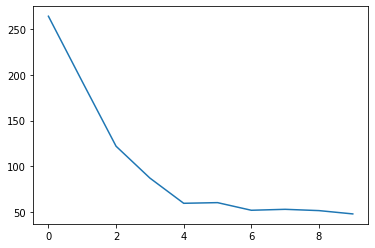

In [114]:
list_eru=[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10]
import matplotlib.pyplot as plt
plt.plot(list_eru)
plt.show()

エルボー法を可視化することができた、適切なkとして、４があげられる

＜クラスタ分析＞

In [2]:
# Wholesale customers Data Setをダウンロードし取り込み
import pandas as pd
import numpy as np

ap_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/Wholesale customers data.csv")

ap_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
# RegionとChannelを取り除く
ap_data1=ap_data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

In [4]:
# PCAのサンプルコードを使用
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(ap_data1)
data_pca = pca.transform(ap_data1)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


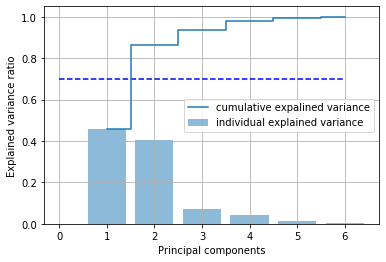

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(ap_data1)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

【問題10】クラスタ数kの選択

In [20]:
# エルボー法でクラスタ数を確認し、可視化する

# k=1の場合
k=1
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k1=SSE_sampel(daz,chiz)

# k=2の場合
k=2
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k2=SSE_sampel(daz,chiz)

# k=3の場合
k=3
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k3=SSE_sampel(daz,chiz)

# k=4の場合
k=4
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k4=SSE_sampel(daz,chiz)

# k=5の場合
k=5
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k5=SSE_sampel(daz,chiz)

# k=6の場合
k=6
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k6=SSE_sampel(daz,chiz)

# k=7の場合
k=7
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k7=SSE_sampel(daz,chiz)

# k=8の場合
k=8
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k8=SSE_sampel(daz,chiz)

# k=9の場合
k=9
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k9=SSE_sampel(daz,chiz)

# k=10の場合
k=10
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k10=SSE_sampel(daz,chiz)

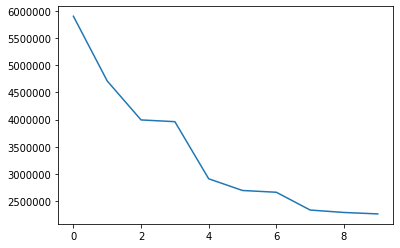

In [21]:
list_eru=[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10]
import matplotlib.pyplot as plt
plt.plot(list_eru)
plt.show()

クラスタ数kについて・・・エルボー法では２か４が適切に思われる。人間が後々どう利用したいのかという点から考えてみると、顧客である小売店やレストランが何段階かのレベルに分けたデータが有用であると思われる、それが２つのクラスでは少し有用度が下がってしまう可能性があるので、クラスタ数は４が妥当に思われ流。それ以上増やしても必要以上に分割されて逆に扱いづらい分析になってしまう可能性がある。

【問題11】既知のグループとの比較

まず、Channelの場合、Regionの場合の既知のグループを可視化する

In [24]:
Channel_data=np.array(ap_data["Channel"])

In [29]:
Channel_data1=Channel_data.reshape(440,1)

In [32]:
Channel_data1.shape

(440, 1)

In [27]:
data_pca.shape

(440, 2)

In [62]:
Channel_data2=np.concatenate([Channel_data1,data_pca],axis=1)
Channel_data3=Channel_data2[np.argsort(Channel_data2[:,0])]

Channel_data4_1=Channel_data3[0:297,1]
Channel_data4_2=Channel_data3[0:297,2]
Channel_data5_1=Channel_data3[298:,1]
Channel_data5_2=Channel_data3[298:,2]

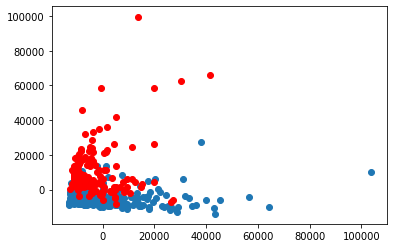

In [64]:
plt.scatter(Channel_data4_1,Channel_data4_2)
plt.scatter(Channel_data5_1,Channel_data5_2,color="red")
plt.show()

In [67]:
Region_data=np.array(ap_data["Region"])
Region_data1=Region_data.reshape(440,1)

Region_data2=np.concatenate([Region_data1,data_pca],axis=1)
Region_data3=Region_data2[np.argsort(Region_data2[:,0])]

In [80]:
Region_data3_1=Region_data3[0:76,1]
Region_data3_2=Region_data3[0:76,2]

Region_data4_1=Region_data3[77:123,1]
Region_data4_2=Region_data3[77:123,2]

Region_data5_1=Region_data3[124:,1]
Region_data5_2=Region_data3[124:,2]

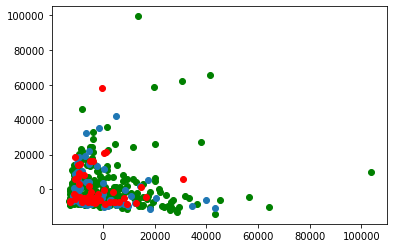

In [83]:
plt.scatter(Region_data5_1,Region_data5_2,color="green")
plt.scatter(Region_data3_1,Region_data3_2)
plt.scatter(Region_data4_1,Region_data4_2,color="red")
plt.show()

In [84]:
# 最適なk=4の場合
k=4
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k4_1=SSE_sampel(daz,chiz)

In [130]:
kage=[]
kage=np.array(kage)
for i in range(len(daz[0][0])):
    kage1=np.hstack((kage,daz[0][0][i]))
    kage=kage1
kage_1=kage.reshape(129,2)
kage_1_1=kage_1[:,0]
kage_1_2=kage_1[:,1]


kage2=[]
kage2=np.array(kage2)
for i in range(len(daz[0][1])):
    kage12=np.hstack((kage2,daz[0][1][i]))
    kage2=kage12
kage_12=kage2.reshape(62,2)
kage_12_1=kage_12[:,0]
kage_12_2=kage_12[:,1]

kage3=[]
kage3=np.array(kage3)
for i in range(len(daz[0][2])):
    kage13=np.hstack((kage3,daz[0][2][i]))
    kage3=kage13
kage_13=kage3.reshape(207,2)
kage_13_1=kage_13[:,0]
kage_13_2=kage_13[:,1]

kage4=[]
kage4=np.array(kage4)
for i in range(len(daz[0][3])):
    kage14=np.hstack((kage4,daz[0][3][i]))
    kage4=kage14
kage_14=kage4.reshape(42,2)
kage_14_1=kage_14[:,0]
kage_14_2=kage_14[:,1]

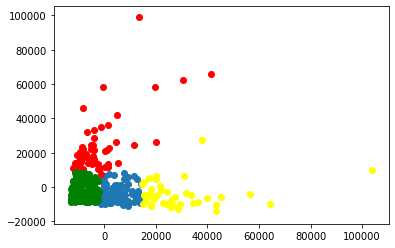

In [131]:
plt.scatter(kage_1_1,kage_1_2)
plt.scatter(kage_12_1,kage_12_2,color="red")
plt.scatter(kage_13_1,kage_13_2,color="green")
plt.scatter(kage_14_1,kage_14_2,color="yellow")
plt.show()

ここでわかりやすく、それぞれの可視化を並べてみる

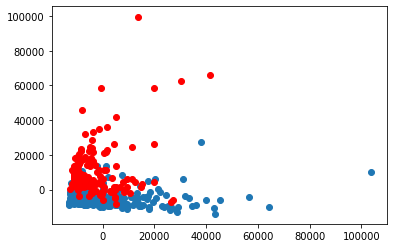

In [132]:
plt.scatter(Channel_data4_1,Channel_data4_2)
plt.scatter(Channel_data5_1,Channel_data5_2,color="red")
plt.show()

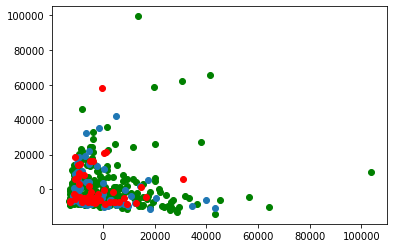

In [133]:
plt.scatter(Region_data5_1,Region_data5_2,color="green")
plt.scatter(Region_data3_1,Region_data3_2)
plt.scatter(Region_data4_1,Region_data4_2,color="red")
plt.show()

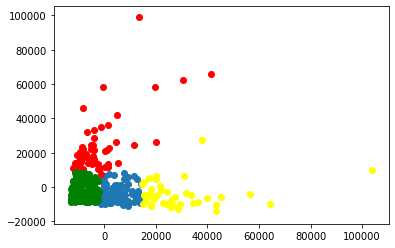

In [134]:
plt.scatter(kage_1_1,kage_1_2)
plt.scatter(kage_12_1,kage_12_2,color="red")
plt.scatter(kage_13_1,kage_13_2,color="green")
plt.scatter(kage_14_1,kage_14_2,color="yellow")
plt.show()

既知のグループとはクラスタリングによって明らかにキレイにグループ分けができていることがわかった

【問題12】卸売業者にとって有益な情報

有益な情報について、ここまでの分析からまとめたい。

可視化してわかったことであるが、RegionとChannelのグループわけはあまり良いグループ分けとなっていないことがわかった。一方で、グループを４つほどのクラスに分けることで、割とキレイにクラスを分割できることがわかった。
Channelは２つのグループに、Regionは３つのグループに分けていたが、今回のケースでのグループ分けは、４つほどのグループに分けることが有用であるようだ。
これ以上分けると、クラスわけの意味が少しずつ薄れてくる（分けても意味がない）可能性がある。

小売店やレストランが、卸売業者から何ユーロ購入しているかというデータであるわけだが、購入金額ごとに４つにグループ分けすることで、それぞれのグループに適切なセールスと、とあるグループでは大きなハズレ値があるため、単価の高い商品でも購入の可能性があるグループとも考えられるため、そのクラスにはまた新たなセールスのチャンスも出てくる可能性も見られる。